In [2]:
import numpy as np
import matplotlib.pyplot as plt

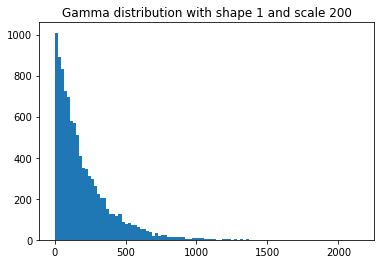

In [4]:
plt.hist(np.random.gamma(1, scale=200, size=10000), bins=100)
plt.title("Gamma distribution with shape 1 and scale 200")
plt.show()

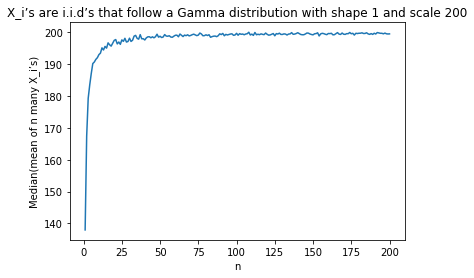

In [7]:
median_of_means = []
for num_summands in range(200):
    means_for_num_summands = []
    for i in range(10000):
        means_for_num_summands.append(
            np.mean(np.random.gamma(
            1, scale=200, size=(num_summands + 1))))
    median_of_means.append(np.median(means_for_num_summands))
plt.plot(np.arange(200)+1, median_of_means)
plt.title(u"X_i’s are i.i.d’s that follow a Gamma distribution "
          "with shape 1 and scale 200")
plt.xlabel(u"n")
plt.ylabel(u"Median(mean of n many X_i’s)")
plt.show()

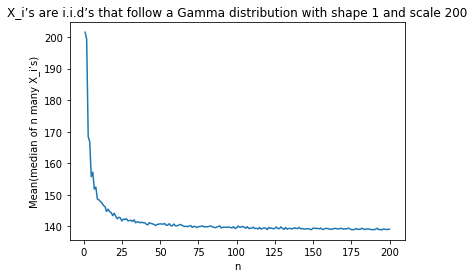

In [10]:
mean_of_medians = []
for num_summands in range(200):
    median_for_num_summands = []
    for i in range(10000):
        median_for_num_summands.append(
            np.median(np.random.gamma(
            1, scale=200, size=(num_summands + 1))))
    mean_of_medians.append(np.mean(median_for_num_summands))
plt.plot(np.arange(200)+1, mean_of_medians)
plt.title(u"X_i’s are i.i.d’s that follow a Gamma distribution "
          "with shape 1 and scale 200")
plt.xlabel(u"n")
plt.ylabel(u"Mean(median of n many X_i’s)")
plt.show()

In [ ]:
# Estimate variance and 3rd cumulant
sample = np.random.gamma(1, scale=200, size=100000)
var = np.var(sample)
cumulant3 = np.mean(
    (np.array(sample) - np.mean(sample)) ** 3)
# Estimate median, mean, and correction for mean of
# an increasing number of i.i.d’s
median_of_means = []
mean_of_means = []
mean_of_means_with_correction = []
MAX_NUM_SUMMANDS = 10
for num_summands in np.arange(MAX_NUM_SUMMANDS) + 1:
    means_for_num_summands = []
    # Sample a mean of num_summands i.i.d’s 10000 times
    # and append to means_for_num_summands
    for i in range(10000):
        sample = np.random.gamma(1, scale=200,
                                 size=num_summands)
        means_for_num_summands.append(np.mean(sample))
    median_of_means.append(np.median(means_for_num_summands))
    mean_of_means.append(np.mean(means_for_num_summands))
    mean_of_means_with_correction.append(
        mean_of_means[-1] - cumulant3 / (6 * var * num_summands))
plt.plot(np.arange(MAX_NUM_SUMMANDS) + 1,
         median_of_means, label="median of means")
plt.plot(np.arange(MAX_NUM_SUMMANDS) + 1,
         mean_of_means, label="mean of means")
plt.plot(np.arange(MAX_NUM_SUMMANDS) + 1,
         mean_of_means_with_correction, label="after correction")
plt.legend()
plt.title("X_i’s are i.i.d’s that follow a Gamma distribution with"
          " shape 1 and scale 200")
plt.xlabel("n")
plt.ylabel("Median(mean of n many X_i’s)")
plt.show()